# Symbolic Computations Using SymPy for Magnetic Method of Moment Computations

This notebook is intended to generate reference solutions using sympy symbolic package.  

## Import Libraries 

In [1]:
import numpy as np
print("Succesfully imported %s -- Version: %s"%(np.__name__,np.__version__))
import scipy
print("Succesfully imported %s -- Version: %s"%(scipy.__name__,scipy.__version__))
import sympy as sym 
print("Succesfully imported %s -- Version: %s"%(sym.__name__,sym.__version__))
import matplotlib.pyplot as plt
print("Succesfully imported %s"% plt.__name__)

Succesfully imported numpy -- Version: 1.21.6
Succesfully imported scipy -- Version: 1.7.3
Succesfully imported sympy -- Version: 1.8
Succesfully imported matplotlib.pyplot


## Section 1: One-Dimensional Model  

In [61]:
# integrate kernel * magnetization to obtain the vector potential 
# computational domain along the x-axis
# vector potential only has a z-component that depends only on x 
# increasing exponent in the integration to 1 or 1.5 fails 
sym.var('x')
sym.var('xp')
kernel = pow((x-xp),-1/2)
magnetization = 1
vp = sym.integrate(kernel*magnetization, (xp, 0,1))
vp 

2.0*x**0.5 - 2.0*(x - 1)**0.5

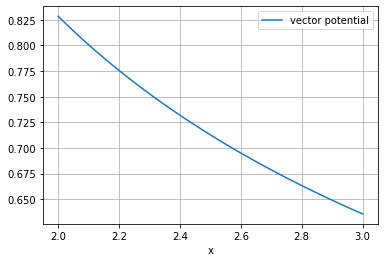

In [62]:
# integrate kernel * magnetization to obtain the vector potential 
sym.var('x')
sym.var('xp')
kernel = pow((x-xp),-1/2)
magnetization = 1
vp = sym.integrate(kernel*magnetization, (xp,0,1))

#..lambdify the symbolic expression 
vp_lambda = sym.lambdify(x, vp)

#..sample the lambda expression for the computed solution 
nsamples = 100 
xvec = np.linspace(2,3,nsamples)
vp_vec = vp_lambda(xvec)

#..plot the computed solution 
plt.plot(xvec,vp_vec,label='vector potential')
plt.xlabel('x')
plt.legend(loc='best')
plt.grid()
plt.show()

## Section 2: One-Dimensional Model

In [65]:
sym.var('x')
sym.var('y')
sym.var('xp')
sym.var('yp')
kernel = pow((pow(x-xp,2)+pow(y-yp,2)),-1/2)
magnetization = xp + yp 
vp = sym.integrate(kernel*magnetization, (xp, 0,1), (yp, 0,1))
vp 

Integral((xp + yp)*(x**2 - 2*x*xp + xp**2 + y**2 - 2*y*yp + yp**2)**(-0.5), (xp, 0, 1), (yp, 0, 1))

In [66]:
#..lambdify the symbolic expression 
vp_lambda = sym.lambdify([x,y],vp)

In [67]:
vp_lambda(.5,.5)

ZeroDivisionError: 0.0 cannot be raised to a negative power

## Section 3: One-Dimensional Model

In [ ]:
sym.var('x')
sym.var('y')
sym.var('z')
sym.var('xp')
sym.var('yp')
sym.var('zp')
kernel = pow((pow(x-xp,2)+pow(y-yp,2)+pow(z-zp,2)),-3/2)
magnetization = 1
vp = sym.integrate(kernel*magnetization, (xp, 0,1), (yp, 0,1), (zp, 0,1))
vp 